In [428]:
import pandas as pd

***Load Data***

In [429]:
df = pd.read_csv("../rawData/TikTok/top-250-tiktokers.csv")
df

,Rank,Username,Country,Followers,Views,Likes,Engagement,Brand Account,Gender,Age,Ethnicity,Famous,Genre,LGBTQ
0,1,@charlidamelio,U.S.A,78.9m,38.3m,6.1m,16.60%,0,Female,16.0,White,0.0,"Dancing, Lipsyncing, Lifestyle",0.0
1,2,@addisonre,U.S.A,53.7m,13.8m,2.8m,20.80%,0,Female,19.0,White,0.0,"Dancing, Lipsyncing",0.0
2,3,@zachking,U.S.A,47.3m,17.6m,2.8m,16%,0,Male,30.0,East Asian,1.0,"Comedy, Illusion",0.0
3,4,@lorengray,U.S.A,46.3m,3.2m,622.6k,19.70%,0,Female,18.0,White,1.0,"Dancing, Lipsyncing",0.0
4,5,@tiktok,U.S.A,45.3m,9.4m,503.0k,5.60%,1,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,@ramneeksingh1313,India,8.6m,479.1k,31.6k,6.70%,0,Male,35.0,South Asian,0.0,"Comedy, Acting",0.0
252,253,@amandacerny,U.S.A,8.6m,654.7k,95.2k,14.60%,0,Female,29.0,White,1.0,"Comedy, Lifestyle",0.0
253,254,@rahimabram,Russia,8.6m,1.6m,271.2k,17%,0,Male,22.0,White,1.0,"Lipsyncing, Promotion, Lifestyle",0.0
254,255,@johnnyorlando,U.S.A,8.6m,1.1m,245.4k,22.70%,0,Male,17.0,White,1.0,"Lipsyncing, Promotion, Lifestyle",0.0


***Data Preparation***

In this section we are looking to complete the following...

- Remove data that is not needed or biased
- Convert values into numerical values
- Handle Null/NaN values
- Seperate our data into x and y

In [430]:
df = df.drop('Rank', axis=1)
df = df.drop('LGBTQ', axis=1)
df = df.drop('Ethnicity', axis=1)
df = df.drop('Famous', axis=1)
df = df.drop('Gender', axis=1)
df = df.drop('Brand Account', axis=1)
df = df.drop('Age', axis=1)
df = df.drop('Username', axis=1)
df

,Country,Followers,Views,Likes,Engagement,Genre
0,U.S.A,78.9m,38.3m,6.1m,16.60%,"Dancing, Lipsyncing, Lifestyle"
1,U.S.A,53.7m,13.8m,2.8m,20.80%,"Dancing, Lipsyncing"
2,U.S.A,47.3m,17.6m,2.8m,16%,"Comedy, Illusion"
3,U.S.A,46.3m,3.2m,622.6k,19.70%,"Dancing, Lipsyncing"
4,U.S.A,45.3m,9.4m,503.0k,5.60%,NaN
...,...,...,...,...,...,...
251,India,8.6m,479.1k,31.6k,6.70%,"Comedy, Acting"
252,U.S.A,8.6m,654.7k,95.2k,14.60%,"Comedy, Lifestyle"
253,Russia,8.6m,1.6m,271.2k,17%,"Lipsyncing, Promotion, Lifestyle"
254,U.S.A,8.6m,1.1m,245.4k,22.70%,"Lipsyncing, Promotion, Lifestyle"


In [431]:
df.dtypes

Country       object
Followers     object
Views         object
Likes         object
Engagement    object
Genre         object
dtype: object

In [432]:
# Turn the analytics into numbers

# Function to convert numbers of types string to float
def string_to_num(s):
    if 'm' in s:
        return float(s.replace('m', '')) * 1e6
    elif 'k' in s:
        return float(s.replace('k', '')) * 1e3
    else:
        return float(s)
    
    
# Convert column values to floats
df['Followers'] = df['Followers'].apply(string_to_num)
df['Views'] = df['Views'].apply(string_to_num)
df['Likes'] = df['Likes'].apply(string_to_num)
    
# Convert percents into decimal values
df['Engagement'] = df['Engagement'].str.rstrip('%')
df['Engagement'] = df['Engagement'].astype('float') / 100.0
df['Engagement'] = df['Engagement'].round(3)
    
df

,Country,Followers,Views,Likes,Engagement,Genre
0,U.S.A,78900000.0,38300000.0,6100000.0,0.166,"Dancing, Lipsyncing, Lifestyle"
1,U.S.A,53700000.0,13800000.0,2800000.0,0.208,"Dancing, Lipsyncing"
2,U.S.A,47300000.0,17600000.0,2800000.0,0.160,"Comedy, Illusion"
3,U.S.A,46300000.0,3200000.0,622600.0,0.197,"Dancing, Lipsyncing"
4,U.S.A,45300000.0,9400000.0,503000.0,0.056,NaN
...,...,...,...,...,...,...
251,India,8600000.0,479100.0,31600.0,0.067,"Comedy, Acting"
252,U.S.A,8600000.0,654700.0,95200.0,0.146,"Comedy, Lifestyle"
253,Russia,8600000.0,1600000.0,271200.0,0.170,"Lipsyncing, Promotion, Lifestyle"
254,U.S.A,8600000.0,1100000.0,245400.0,0.227,"Lipsyncing, Promotion, Lifestyle"


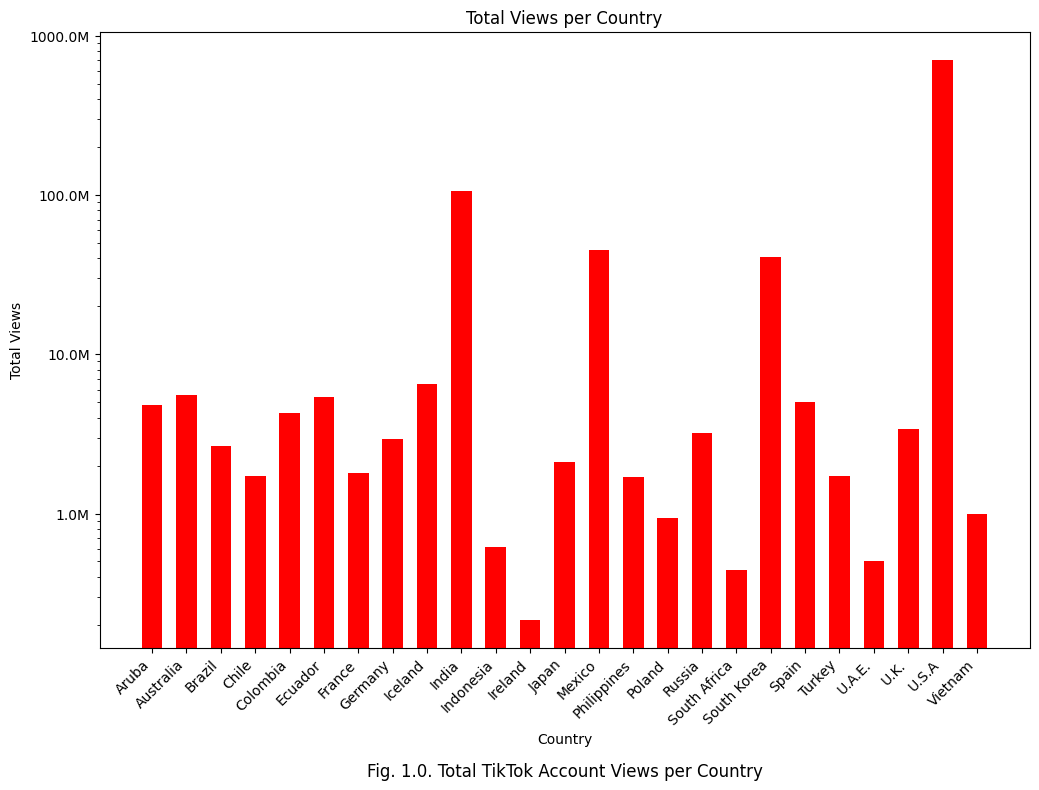

In [433]:
import matplotlib.pyplot as plt

# Create bar graph
x_y_data = df.groupby('Country')['Views'].sum().reset_index()

# Function to set y axis
def format_y_axis(x, pos):
    if x >= 1e6:
        return f'{x * 1e-6:.1f}M'
    if x >= 1e3:
        return f'{x * 1e-3:.1f}K'
    return str(int(x))

plt.figure(figsize=(12, 8)) 
bars = plt.bar(x_y_data['Country'], x_y_data['Views'], color='red', width=0.6)

plt.xticks(rotation=45, ha='right')  
plt.yscale('log')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_y_axis))

plt.xlabel('Country')
plt.ylabel('Total Views')
plt.title('Total Views per Country')
plt.text(0.5, -0.20, 'Fig. 1.0. Total TikTok Account Views per Country',
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.show()

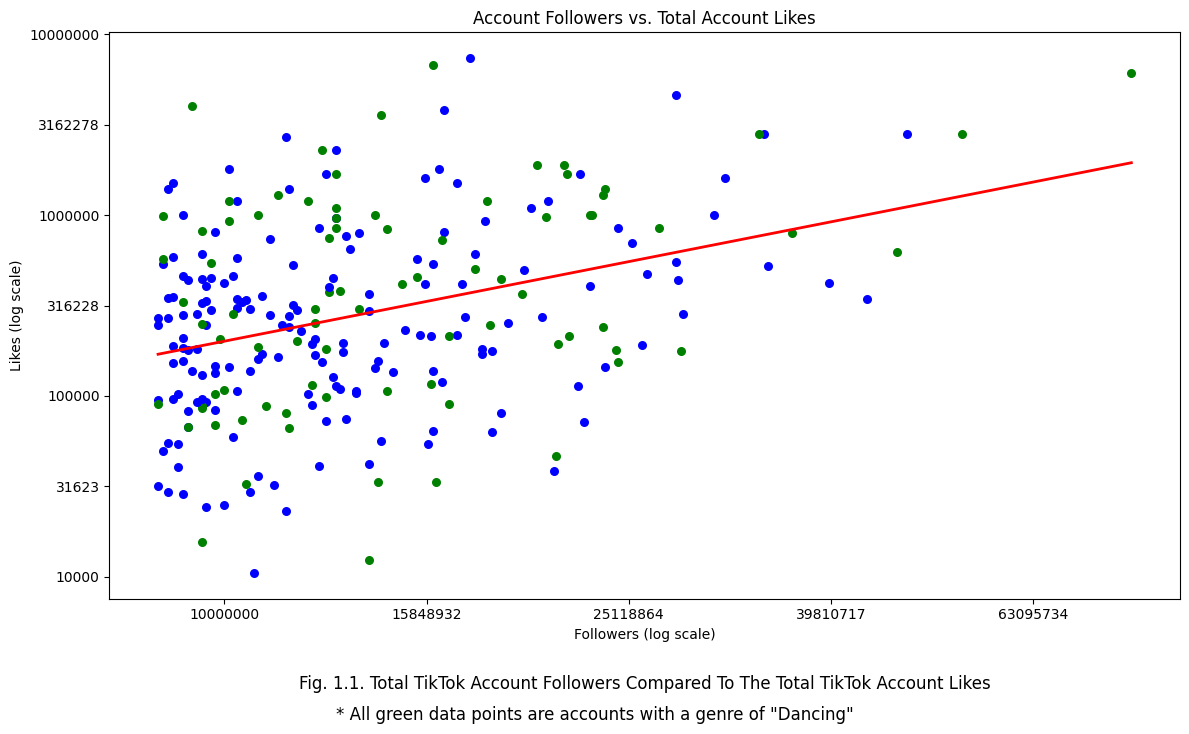

In [434]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
import numpy as np

# Drop rows where 'Genre' is NaN
df_filtered = df.dropna(subset=['Genre'])

# Create Scatter Plot
plt.figure(figsize=(12, 8))

# Prepare data for linear regression
x = np.log10(df_filtered['Followers']).values.reshape(-1, 1)
y = np.log10(df_filtered['Likes']).values

# Scatter plot with log encoding and genre-based coloring
for i in range(len(df_filtered)):
    genres = df_filtered.iloc[i]['Genre']
    if 'Dancing' in genres:
        plt.scatter(np.log10(df_filtered.iloc[i]['Followers']), np.log10(df_filtered.iloc[i]['Likes']), color='green', s=30)
    else:
        plt.scatter(np.log10(df_filtered.iloc[i]['Followers']), np.log10(df_filtered.iloc[i]['Likes']), color='blue', s=30)

# Fit the linear regression model
reg = LinearRegression().fit(x, y)

# Predict values for the line
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = reg.predict(x_range)

# Plot the regression line
plt.plot(x_range, y_pred, color='red', linewidth=2)

# Formatter function
def format_axis(x, pos):
    return f'{10**x:.0f}'

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_axis))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_axis))

plt.xlabel('Followers (log scale)')
plt.ylabel('Likes (log scale)')
plt.title('Account Followers vs. Total Account Likes')

# Add the text annotation at the bottom of the figure
plt.figtext(0.5, 0.1, '* All green data points are accounts with a genre of "Dancing"', 
            ha='center', va='center', fontsize=12, color='black')

plt.text(0.5, -0.15, 'Fig. 1.1. Total TikTok Account Followers Compared To The Total TikTok Account Likes',
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust layout to fit the new text
plt.show()


In [435]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Scale analytics

# Scale values down by using the log of it
df['Followers'] = np.log1p(df['Followers'])
df['Views'] = np.log1p(df['Views'])
df['Likes'] = np.log1p(df['Likes'])
df['Engagement'] = np.log1p(df['Engagement'])

# Normalization
# Scale the columns value down to fit between a range of 0 to 1, 
scaler = MinMaxScaler()
df[['Followers', 'Views', 'Likes', 'Engagement']] = scaler.fit_transform(df[['Followers', 'Views', 'Likes', 'Engagement']])

df

,Country,Followers,Views,Likes,Engagement,Genre
0,U.S.A,1.000000,0.948339,0.970540,0.420301,"Dancing, Lipsyncing, Lifestyle"
1,U.S.A,0.826401,0.786001,0.851800,0.554876,"Dancing, Lipsyncing"
2,U.S.A,0.769145,0.824683,0.851800,0.400681,"Comedy, Illusion"
3,U.S.A,0.759504,0.553570,0.622535,0.520088,"Dancing, Lipsyncing"
4,U.S.A,0.749653,0.724938,0.590006,0.043463,NaN
...,...,...,...,...,...,...
251,India,0.000000,0.251566,0.168002,0.082872,"Comedy, Acting"
252,U.S.A,0.000000,0.301227,0.336169,0.354504,"Comedy, Lifestyle"
253,Russia,0.000000,0.443337,0.495808,0.433325,"Lipsyncing, Promotion, Lifestyle"
254,U.S.A,0.000000,0.383748,0.480564,0.614225,"Lipsyncing, Promotion, Lifestyle"


In [436]:
# Check how many column values are null
df.isna().sum()

Country       0
Followers     0
Views         0
Likes         0
Engagement    0
Genre         2
dtype: int64

In [437]:
# Fill in missing/null values
df["Genre"] = df["Genre"].fillna("noGenre")

In [438]:
# Check to make sure there no null values
df.isna().sum()

Country       0
Followers     0
Views         0
Likes         0
Engagement    0
Genre         0
dtype: int64

In [439]:
df

,Country,Followers,Views,Likes,Engagement,Genre
0,U.S.A,1.000000,0.948339,0.970540,0.420301,"Dancing, Lipsyncing, Lifestyle"
1,U.S.A,0.826401,0.786001,0.851800,0.554876,"Dancing, Lipsyncing"
2,U.S.A,0.769145,0.824683,0.851800,0.400681,"Comedy, Illusion"
3,U.S.A,0.759504,0.553570,0.622535,0.520088,"Dancing, Lipsyncing"
4,U.S.A,0.749653,0.724938,0.590006,0.043463,noGenre
...,...,...,...,...,...,...
251,India,0.000000,0.251566,0.168002,0.082872,"Comedy, Acting"
252,U.S.A,0.000000,0.301227,0.336169,0.354504,"Comedy, Lifestyle"
253,Russia,0.000000,0.443337,0.495808,0.433325,"Lipsyncing, Promotion, Lifestyle"
254,U.S.A,0.000000,0.383748,0.480564,0.614225,"Lipsyncing, Promotion, Lifestyle"


In [440]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split the Genre column into separate genres
df['Genre'] = df['Genre'].str.split(', ')

# Turn genres into numerical values
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df['Genre']), columns=mlb.classes_, index=df.index)
df = pd.concat([df.drop(columns=['Genre']), genre_encoded], axis=1)

df

,Country,Followers,Views,Likes,Engagement,Acting,Art,Comedy,Content House,DIY,...,Pets,Photography,Pranking,Pranking,Promotion,Reacting,Relationship,Reviews,Singing,noGenre
0,U.S.A,1.000000,0.948339,0.970540,0.420301,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,U.S.A,0.826401,0.786001,0.851800,0.554876,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,U.S.A,0.769145,0.824683,0.851800,0.400681,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,U.S.A,0.759504,0.553570,0.622535,0.520088,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,U.S.A,0.749653,0.724938,0.590006,0.043463,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,India,0.000000,0.251566,0.168002,0.082872,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
252,U.S.A,0.000000,0.301227,0.336169,0.354504,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
253,Russia,0.000000,0.443337,0.495808,0.433325,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
254,U.S.A,0.000000,0.383748,0.480564,0.614225,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [441]:
# Encode countries into numerical values
df = pd.get_dummies(df, columns=['Country'])

# Convert booleans into integer type
country_columns = [col for col in df.columns if 'Country_' in col]
df[country_columns] = df[country_columns].astype(int)

df

,Followers,Views,Likes,Engagement,Acting,Art,Comedy,Content House,DIY,Dancing,...,Country_Poland,Country_Russia,Country_South Africa,Country_South Korea,Country_Spain,Country_Turkey,Country_U.A.E.,Country_U.K.,Country_U.S.A,Country_Vietnam
0,1.000000,0.948339,0.970540,0.420301,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.826401,0.786001,0.851800,0.554876,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.769145,0.824683,0.851800,0.400681,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.759504,0.553570,0.622535,0.520088,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.749653,0.724938,0.590006,0.043463,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.000000,0.251566,0.168002,0.082872,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,0.000000,0.301227,0.336169,0.354504,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
253,0.000000,0.443337,0.495808,0.433325,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
254,0.000000,0.383748,0.480564,0.614225,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [442]:
# Write preprocessed data to csv
file_path = "../processedDataset/preprocessedAccountData.csv"
df.to_csv(file_path, index=False)

# display column types
df.dtypes

Followers                float64
Views                    float64
Likes                    float64
Engagement               float64
Acting                     int64
Art                        int64
Comedy                     int64
Content House              int64
DIY                        int64
Dancing                    int64
Dancing                    int64
Education                  int64
Family                     int64
Family                     int64
Fitness                    int64
Food                       int64
Highlights                 int64
Illusion                   int64
Lifestyle                  int64
Lipsyncing                 int64
Lipsyncing                 int64
Makeup                     int64
Media                      int64
Motivational Speaking      int64
Parkour                    int64
Pets                       int64
Photography                int64
Pranking                   int64
Pranking                   int64
Promotion                  int64
Reacting  

***Training and Testing our Model***

In this section we are looking to...

- Split the data into an independent and dependent variables
- Use our model to predict a COUNTRY


In [443]:
# Split data into x values
x = df.filter(regex='^(Followers|Views|Likes|Engagement)')
x

,Followers,Views,Likes,Engagement
0,1.000000,0.948339,0.970540,0.420301
1,0.826401,0.786001,0.851800,0.554876
2,0.769145,0.824683,0.851800,0.400681
3,0.759504,0.553570,0.622535,0.520088
4,0.749653,0.724938,0.590006,0.043463
...,...,...,...,...
251,0.000000,0.251566,0.168002,0.082872
252,0.000000,0.301227,0.336169,0.354504
253,0.000000,0.443337,0.495808,0.433325
254,0.000000,0.383748,0.480564,0.614225


In [444]:
# Split data into y values
y = df.filter(regex='^Country_', axis=1)
y

,Country_Aruba,Country_Australia,Country_Brazil,Country_Chile,Country_Colombia,Country_Ecuador,Country_France,Country_Germany,Country_Iceland,Country_India,...,Country_Poland,Country_Russia,Country_South Africa,Country_South Korea,Country_Spain,Country_Turkey,Country_U.A.E.,Country_U.K.,Country_U.S.A,Country_Vietnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
253,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [445]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming x and y are defined properly
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize LinearRegression model
model = LinearRegression()

# Fit the model on the training set
model.fit(x_train, y_train)

# Predict on the test set
y_test_pred = model.predict(x_test)

# Convert continuous predictions to binary predictions for classification metrics
y_test_pred_binary = np.round(y_test_pred)  # assuming a threshold of 0.5

# Calculate precision, recall, F1 score, and accuracy with zero_division parameter
test_precision = precision_score(y_test, y_test_pred_binary, average='weighted', zero_division=1)
test_recall = recall_score(y_test, y_test_pred_binary, average='weighted', zero_division=1)
test_f1 = f1_score(y_test, y_test_pred_binary, average='weighted', zero_division=1)
test_accuracy = accuracy_score(y_test, y_test_pred_binary)

# Display results in a DataFrame
results = pd.DataFrame({
    'Metric': [
        'Precision', 'Recall', 'F1 Score', 'Accuracy'
    ],
    'Value': [
        test_precision, test_recall, test_f1, test_accuracy
    ]
})

# Print the formatted DataFrame
results


,Metric,Value
0,Precision,0.797476
1,Recall,0.615385
2,F1 Score,0.574380
3,Accuracy,0.615385


In [446]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd
import numpy as np

# Assuming x and y are defined and imported properly
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier(random_state=42, max_depth=5, min_samples_split=5, min_samples_leaf=3)

# Fit the model on the training set
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='macro', zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, average='macro', zero_division=0)

# Perform five-fold cross-validation for accuracy
cv_accuracy = cross_val_score(model, x, y, cv=5, scoring='accuracy')
cv_accuracy_mean = np.mean(cv_accuracy)
print("Cross-validation accuracy scores:", cv_accuracy)


# Prepare data for table
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1]
})

# Display DataFrame
results


Cross-validation accuracy scores: [0.80769231 0.60784314 0.56862745 0.49019608 0.52941176]


,Metric,Test Set
0,Accuracy,0.634615
1,Precision,0.057455
2,Recall,0.067886
3,F1-Score,0.062069


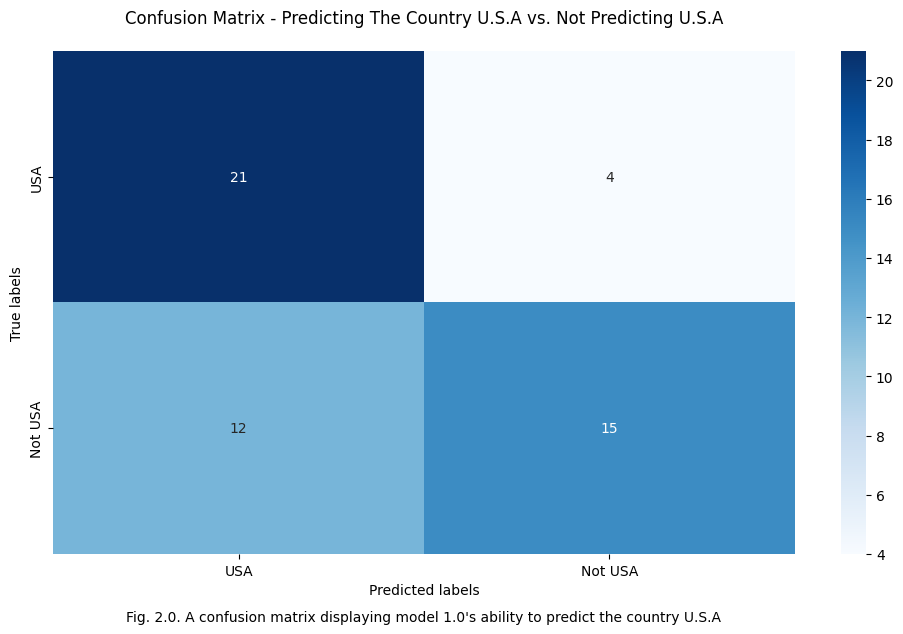

In [447]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Function to plot confusion matrix for the specified target variable
def plot_confusion_matrix(y_true, y_pred, output_name, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 7))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['USA', 'Not USA'], yticklabels=['USA', 'Not USA'])
    ax.set_title('Confusion Matrix - Predicting The Country U.S.A vs. Not Predicting U.S.A', pad=20)  # Add padding to the title
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    
    plt.tight_layout()
    
    # Add whitespace for the caption
    plt.subplots_adjust(bottom=0.2)
    plt.text(0.5, -0.125, 'Fig. 2.0. A confusion matrix displaying model 1.0\'s ability to predict the country U.S.A',
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
    
    plt.show()

# Assuming y_test and y_test_pred are pandas DataFrames or numpy arrays
# If they are pandas DataFrames, convert them to numpy arrays
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.to_numpy()
if isinstance(y_test_pred, pd.DataFrame):
    y_test_pred = y_test_pred.to_numpy()

# Specify the column of interest
column_name = 'Country_U.S.A'

# Ensure y_test and y_test_pred contain only the column of interest
y_test_country_usa = y_test[:, y.columns.get_loc(column_name)]
y_test_pred_country_usa = y_test_pred[:, y.columns.get_loc(column_name)]

# Define the labels
all_labels_country_usa = [1, 0]  # 1 for USA and 0 for Not USA

# Plot the confusion matrix for the specified column
plot_confusion_matrix(y_test_country_usa, y_test_pred_country_usa, column_name, all_labels_country_usa)

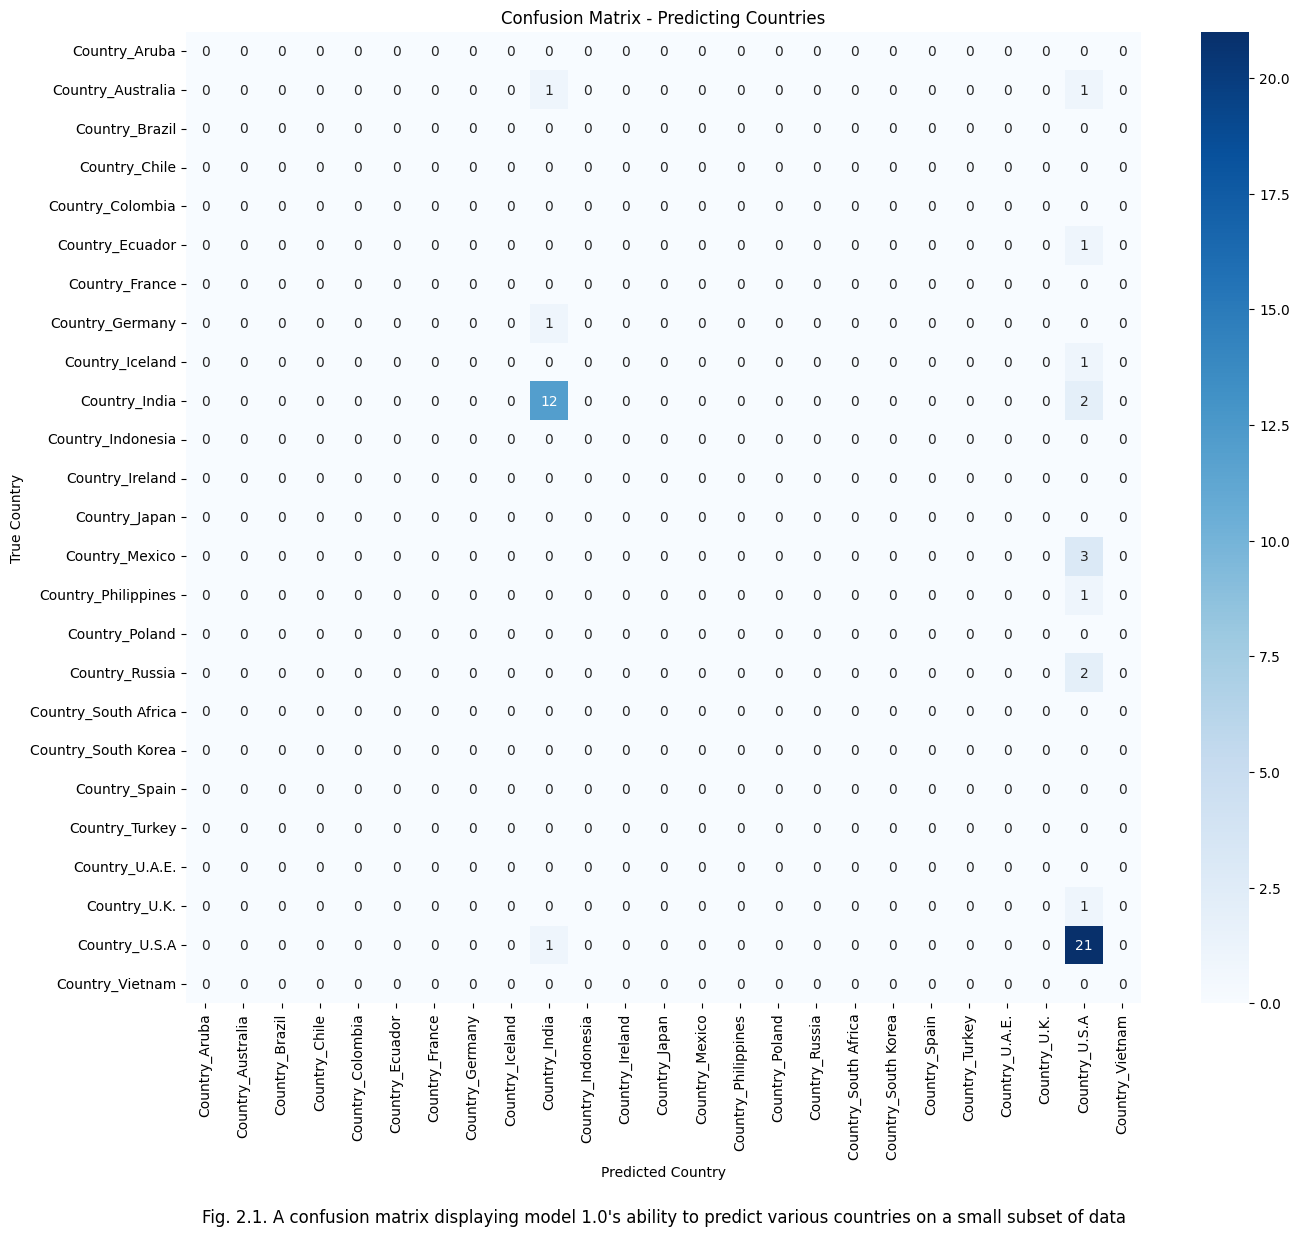

In [448]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Convert DataFrames to NumPy arrays if necessary
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.to_numpy()
if isinstance(y_test_pred, pd.DataFrame):
    y_test_pred = y_test_pred.to_numpy()

# Identify columns starting with 'Country_'
country_columns = [col for col in y.columns if col.startswith('Country_')]

# Initialize lists to hold true and predicted labels
y_true_combined = np.zeros_like(y_test[:, 0])
y_pred_combined = np.zeros_like(y_test_pred[:, 0])

# Collect true and predicted labels for each country column
for i, col in enumerate(country_columns):
    # Extract the true and predicted labels for the current country
    y_true_label = y_test[:, i] if isinstance(y_test, np.ndarray) else y_test[:, i].values
    y_pred_label = y_test_pred[:, i] if isinstance(y_test_pred, np.ndarray) else y_test_pred[:, i].values

    # Update combined labels for each country column
    y_true_combined += y_true_label * (i + 1)
    y_pred_combined += y_pred_label * (i + 1)

# Create a confusion matrix where rows and columns represent countries
num_countries = len(country_columns)
cm = np.zeros((num_countries, num_countries))

for true, pred in zip(y_true_combined, y_pred_combined):
    # Ensure true and pred values are within the valid range
    if 1 <= int(true) <= num_countries and 1 <= int(pred) <= num_countries:
        cm[int(true) - 1, int(pred) - 1] += 1

# Convert to integer type
cm = cm.astype(int)

# Create a DataFrame for better readability
labels = country_columns
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the combined confusion matrix
plt.figure(figsize=(14, 12))
ax = sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
ax.set_title('Confusion Matrix - Predicting Countries')
ax.set_xlabel('Predicted Country')
ax.set_ylabel('True Country')

plt.tight_layout()

plt.text(0.5, -0.22, 'Fig. 2.1. A confusion matrix displaying model 1.0\'s ability to predict various countries on a small subset of data',
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()


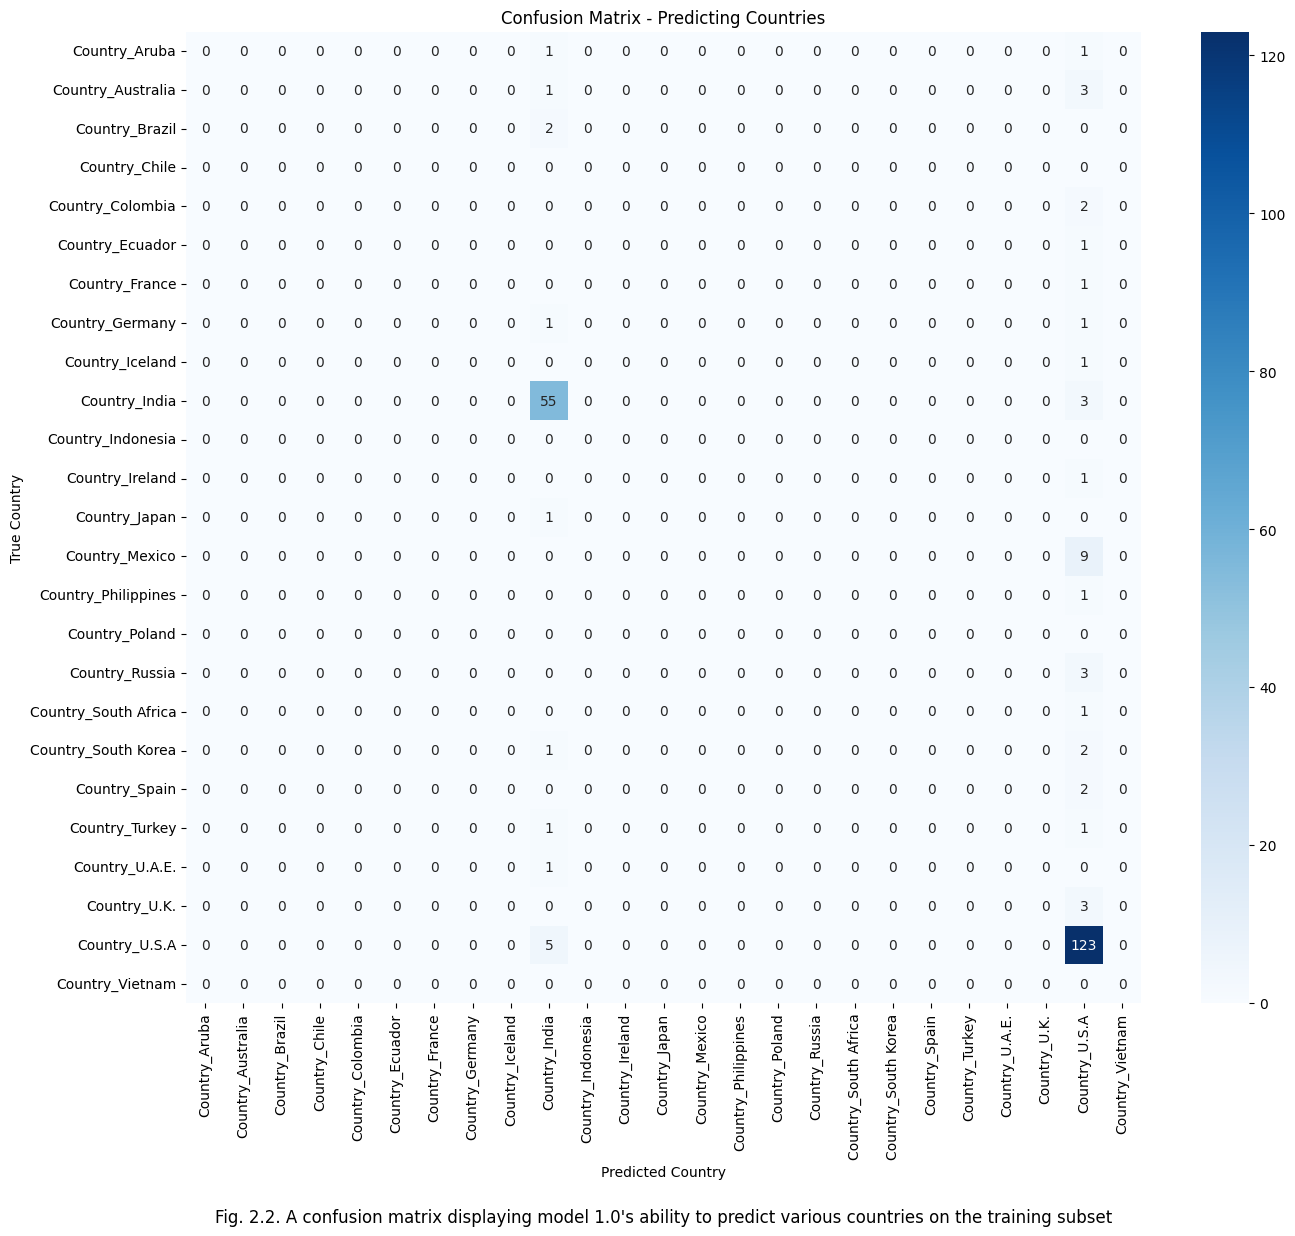

In [449]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming `x` and `y` are your features and target DataFrame
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier(random_state=42, max_depth=5, min_samples_split=5, min_samples_leaf=3)

# Fit the model on the training set
model.fit(X_train, y_train)

# Predict on the entire dataset
y_pred = model.predict(x)

# Ensure y and y_pred are still DataFrames for column access
if isinstance(y, pd.DataFrame):
    country_columns = [col for col in y.columns if col.startswith('Country_')]
else:
    raise ValueError("y should be a DataFrame to access column names.")

# Convert DataFrames to NumPy arrays for computation
if isinstance(y, pd.DataFrame):
    y = y.to_numpy()
if isinstance(y_pred, pd.DataFrame):
    y_pred = y_pred.to_numpy()


# Initialize arrays to hold true and predicted labels
num_countries = len(country_columns)
y_true_combined = np.zeros(len(y))
y_pred_combined = np.zeros(len(y_pred))

# Collect true and predicted labels for each country column
for i, col in enumerate(country_columns):
    # Extract the true and predicted labels for the current country
    y_true_label = y[:, i] if isinstance(y, np.ndarray) else y[:, i].values
    y_pred_label = y_pred[:, i] if isinstance(y_pred, np.ndarray) else y_pred[:, i].values

    # Update combined labels for each country column
    y_true_combined += y_true_label * (i + 1)
    y_pred_combined += y_pred_label * (i + 1)


# Create a confusion matrix where rows and columns represent countries
cm = np.zeros((num_countries, num_countries))

for true, pred in zip(y_true_combined, y_pred_combined):
    # Ensure true and pred values are within the valid range
    if 1 <= int(true) <= num_countries and 1 <= int(pred) <= num_countries:
        cm[int(true) - 1, int(pred) - 1] += 1


# Convert to integer type
cm = cm.astype(int)

# Create a DataFrame for better readability
labels = country_columns
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the combined confusion matrix
plt.figure(figsize=(14, 12))
ax = sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
ax.set_title('Confusion Matrix - Predicting Countries')
ax.set_xlabel('Predicted Country')
ax.set_ylabel('True Country')

plt.tight_layout()

plt.text(0.5, -0.22, 'Fig. 2.2. A confusion matrix displaying model 1.0\'s ability to predict various countries on the training subset',
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()


***Training and Testing our Model***

In this section we are looking to...

- Split the data into an independent and dependent variables
- Use our model to predict # of FOLLOWERS


In [450]:
# Split data into x values
x = df.filter(regex='^(Views|Likes|Engagement)')
x

,Views,Likes,Engagement
0,0.948339,0.970540,0.420301
1,0.786001,0.851800,0.554876
2,0.824683,0.851800,0.400681
3,0.553570,0.622535,0.520088
4,0.724938,0.590006,0.043463
...,...,...,...
251,0.251566,0.168002,0.082872
252,0.301227,0.336169,0.354504
253,0.443337,0.495808,0.433325
254,0.383748,0.480564,0.614225


In [451]:
# Split data into x values
y = df.filter(regex='^Followers')

y

,Followers
0,1.000000
1,0.826401
2,0.769145
3,0.759504
4,0.749653
...,...
251,0.000000
252,0.000000
253,0.000000
254,0.000000


In [452]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold
import pandas as pd
import numpy as np

# Assuming x and y are defined properly
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ensure y is a 1-dimensional array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Initialize LinearRegression model
model = LinearRegression()

# Fit the model on the training set
model.fit(x_train, y_train)

# Predict on the test set
y_test_pred = model.predict(x_test)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate residuals
test_residuals = y_test - y_test_pred

# Standard deviations of residuals for each metric
mse_std = np.std(test_residuals**2, ddof=1)
rmse_std = np.sqrt(mse_std)
mae_std = np.std(np.abs(test_residuals), ddof=1)

# Perform cross-validation to calculate standard deviation of R-squared
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []

for train_index, test_index in kf.split(x):
    X_train_kf, X_test_kf = x.iloc[train_index], x.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    # Ensure y is a 1-dimensional array
    y_train_kf = y_train_kf.values.ravel()
    y_test_kf = y_test_kf.values.ravel()
    
    model.fit(X_train_kf, y_train_kf)
    y_test_pred_kf = model.predict(X_test_kf)
    r2_scores.append(r2_score(y_test_kf, y_test_pred_kf))

r2_std = np.std(r2_scores, ddof=1)

# Display results in a DataFrame
results = pd.DataFrame({
    'Metric': [
        'Mean Squared Error', 'Root Mean Squared Error',
        'Mean Absolute Error', 'R-squared'
    ],
    'Value': [
        test_mse, test_rmse,
        test_mae, test_r2
    ],
    'Standard Deviation': [
        mse_std, rmse_std,
        mae_std, r2_std
    ]
})

# Print the formatted DataFrame
results


,Metric,Value,Standard Deviation
0,Mean Squared Error,0.031847,0.031833
1,Root Mean Squared Error,0.178456,0.178418
2,Mean Absolute Error,0.157755,0.084241
3,R-squared,0.151404,0.050812


In [453]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Assuming x and y are defined properly
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ensure y is a 1-dimensional array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Initialize RandomForestRegressor model
model = RandomForestRegressor(random_state=42, max_depth=5, min_samples_split=3, min_samples_leaf=5)

# Fit the model on the training set
model.fit(x_train, y_train)

# Predict on the test set
y_test_pred = model.predict(x_test)

# Calculate evaluation metrics for the test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate residuals
test_residuals = y_test - y_test_pred

# Standard deviations of residuals for each metric
mse_std = np.std(test_residuals**2, ddof=1)
rmse_std = np.sqrt(mse_std)
mae_std = np.std(np.abs(test_residuals), ddof=1)

# Perform multiple splits to calculate standard deviation of R-squared
kf = KFold(n_splits=10, shuffle=True, random_state=42)
r2_scores = []

for train_index, test_index in kf.split(x):
    X_train_kf, X_test_kf = x.iloc[train_index], x.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    # Ensure y is a 1-dimensional array
    y_train_kf = y_train_kf.values.ravel()
    y_test_kf = y_test_kf.values.ravel()
    
    model.fit(X_train_kf, y_train_kf)
    y_test_pred_kf = model.predict(X_test_kf)
    r2_scores.append(r2_score(y_test_kf, y_test_pred_kf))

r2_std = np.std(r2_scores, ddof=1)

# Display results in a formatted DataFrame
results = pd.DataFrame({
    'Metric': [
        'Mean Squared Error',
        'Root Mean Squared Error',
        'Mean Absolute Error',
        'R-squared'
    ],
    'Value': [
        test_mse,
        test_rmse,
        test_mae,
        test_r2
    ],
    'Standard Deviation': [
        mse_std,
        rmse_std,
        mae_std,
        r2_std
    ]
})

# Print the formatted DataFrame
results


,Metric,Value,Standard Deviation
0,Mean Squared Error,0.029329,0.028559
1,Root Mean Squared Error,0.171257,0.168994
2,Mean Absolute Error,0.150399,0.082709
3,R-squared,0.218487,0.282560


***Training and Testing our Model***

In this section we are looking to...

- Split the data into an independent and dependent variables
- Use our model to predict a GENRE


In [454]:
# Split data into x values
x = df.filter(regex='^(Followers|Views|Likes|Engagement)')
x

,Followers,Views,Likes,Engagement
0,1.000000,0.948339,0.970540,0.420301
1,0.826401,0.786001,0.851800,0.554876
2,0.769145,0.824683,0.851800,0.400681
3,0.759504,0.553570,0.622535,0.520088
4,0.749653,0.724938,0.590006,0.043463
...,...,...,...,...
251,0.000000,0.251566,0.168002,0.082872
252,0.000000,0.301227,0.336169,0.354504
253,0.000000,0.443337,0.495808,0.433325
254,0.000000,0.383748,0.480564,0.614225


In [455]:
# Split data into x values
y = df.drop(columns=df.filter(regex='^(Followers|Views|Likes|Engagement|^Country_)').columns)
y

,Acting,Art,Comedy,Content House,DIY,Dancing,Dancing,Education,Family,Family,...,Pets,Photography,Pranking,Pranking,Promotion,Reacting,Relationship,Reviews,Singing,noGenre
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [456]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming x and y are defined and imported properly
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize LinearRegression
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Convert predictions to binary values for classification metrics
# Assume a threshold of 0.5 to binarize predictions (adjust as needed)
threshold = 0.5
y_test_pred_binary = (y_test_pred > threshold).astype(int)

# Calculate evaluation metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
test_precision = precision_score(y_test, y_test_pred_binary, average='micro')  # Use appropriate average for multi-label classification
test_recall = recall_score(y_test, y_test_pred_binary, average='micro')  # Use appropriate average for multi-label classification
test_f1 = f1_score(y_test, y_test_pred_binary, average='micro')  # Use appropriate average for multi-label classification

# Prepare data for table
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1]
})

# Display DataFrame
results


,Metric,Test Set
0,Accuracy,0.038462
1,Precision,0.409091
2,Recall,0.086538
3,F1-Score,0.142857


In [457]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming x and y are defined and imported properly
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier(random_state=42, max_depth=5, min_samples_split=5, min_samples_leaf=3)

# Fit the model on the training set
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='micro')  # Use appropriate average for multi-label classification
test_recall = recall_score(y_test, y_test_pred, average='micro')  # Use appropriate average for multi-label classification
test_f1 = f1_score(y_test, y_test_pred, average='micro')  # Use appropriate average for multi-label classification

# Prepare data for table
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1]
})

# Display DataFrame
results


,Metric,Test Set
0,Accuracy,0.038462
1,Precision,0.526316
2,Recall,0.192308
3,F1-Score,0.281690
